In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
from a_star import GridNode, a_star

In [100]:
# start - стартовая вершина;
# finish - конечная вершина;
# graph - список булевых списков, имитирующий матрицу вершин,
# значения False в graph имитируют стены, то есть вершины, в которые нельзя перейти из соседней вершины;
# на графе красным цветом обозначены стены
def get_solution(start, finish, graph):
    # путь полученный от а*
    apath = a_star(start, finish, graph)
    xpath = []
    ypath = []
    # преобразование пути в (x, y)
    for n in apath:
        xpath.append(n.x)
        ypath.append(n.y)

    height = len(graph)
    width = len(graph[0])
    scatter_size = 160
    col = np.where(np.array(graph)==True, 'grey', 'red')

    fig, ax = plt.subplots(1, 2, figsize=(16, 9), dpi=80)
    # добавляются вершины и отмечается путь, стены, старт, финиш
    for i in range(height):
        ax[0].scatter(range(width), [i]*width, c=col[i], s=scatter_size)
        ax[1].scatter(range(width), [i]*width, c=col[i], s=scatter_size)
    ax[0].scatter(start.x, start.y, s=scatter_size, label='start')
    ax[1].scatter(start.x, start.y, s=scatter_size)
    ax[0].scatter(finish.x, finish.y, s=scatter_size, label='finish')
    ax[1].scatter(finish.x, finish.y, s=scatter_size)
    ax[1].scatter(xpath[1:-1], ypath[1:-1], s=scatter_size, label='path')

    # добавляется сетка, легенда, названия к осям
    xticks = range(0, width+1)
    yticks = range(0, height+1)
    for i in range(2):        
        ax[i].set_xticks(xticks)
        ax[i].set_yticks(yticks)
        ax[i].grid()
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Y')
        ax[i].legend()

    ax[0].set_title('Layout')
    ax[1].set_title('Solution')
    plt.show()

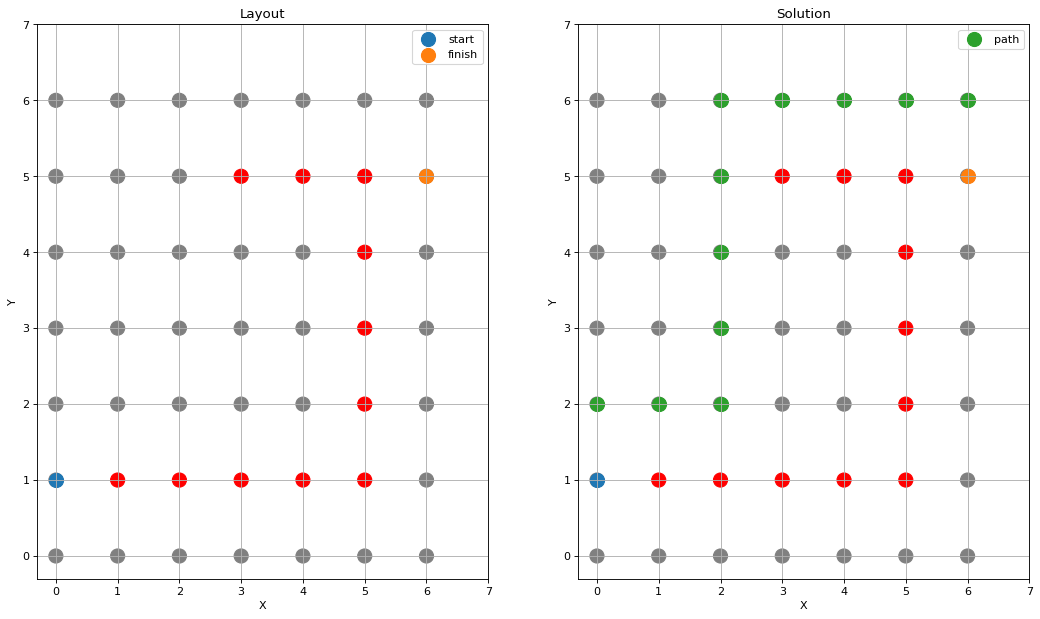

In [101]:
height = 7
width = 7
start = GridNode(0, 1)
finish = GridNode(6, 5)
graph = [[True]*width for x in range(height)]

for i in range(1, 6):
    graph[1][i] = False
    graph[i][5] = False
for i in range(3, 6):
    graph[5][i] = False

get_solution(start, finish, graph)